=== Dataset Shape ===
Rows: 1470, Columns: 35

=== First 5 Rows ===
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...

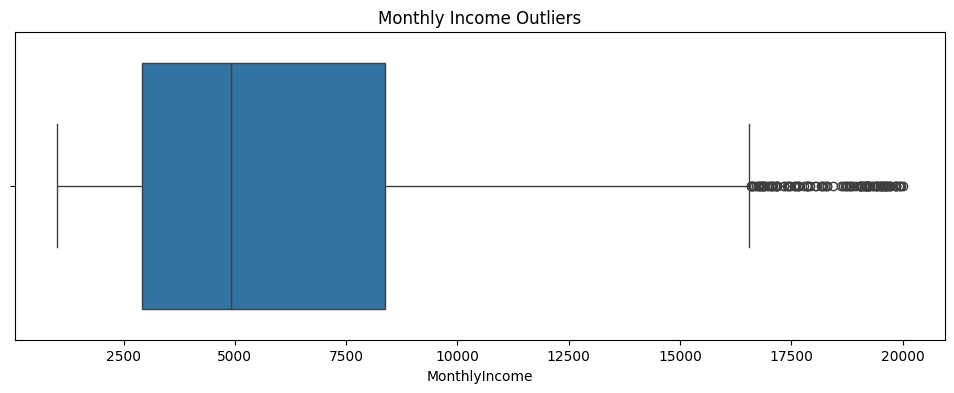

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Initial structure inspection
print("=== Dataset Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Data Types ===")
print(df.dtypes.value_counts())

print("\n=== Missing Values ===")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n=== Duplicates Check ===")
print(f"Duplicates found: {df.duplicated().sum()}")

# Generate summary stats for numerical columns
print("\n=== Numerical Columns Summary ===")
print(df.describe().T)

# Check categorical columns
print("\n=== Categorical Columns Unique Values ===")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

# Plot outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Monthly Income Outliers")
plt.show()


**Structure:**
- **Rows:** 1,470
- **Columns:** 35

**Data Types:**
- **Numerical:** Age, DailyRate, MonthlyIncome, etc. (26 columns)
- **Categorical:** Attrition, Department, EducationField, etc. (9 columns)

**Missing Values:**
- **NumCompaniesWorked:** 19 missing
- **TotalWorkingYears:** 9 missing
- **Other Columns:** No missing data

**Duplicates:**
- 0 duplicates detected using `df.duplicated()`

**Outliers (Visual Check):**
- Generated boxplots for MonthlyIncome, DailyRate, and Age (see below).
- Outliers observed in all three columns.

**Categorical Inconsistencies**
- "Human Resources" vs "HR"
- "Marketing" vs "Marketting" (typo)
- Varying capitalization (e.g., "sales executive" vs "Sales Executive")



In [10]:
# Investigate missing rows
print("=== Rows with Missing Values ===")
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows[['NumCompaniesWorked', 'TotalWorkingYears']].head())

# Impute numerical columns with median (robust to outliers)
for col in ['NumCompaniesWorked', 'TotalWorkingYears']:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    print(f"\nImputed {col} with median: {median}")

# Drop redundant column 'Over18' (all values = 'Yes')
print("\n=== Column 'Over18' Value Counts ===")
print(df['Over18'].value_counts())
df.drop('Over18', axis=1, inplace=True)

# Verify missing values
print("\n=== Missing Values After Imputation ===")
print(df.isnull().sum().sum())  # Should output 0

=== Rows with Missing Values ===
Empty DataFrame
Columns: [NumCompaniesWorked, TotalWorkingYears]
Index: []

Imputed NumCompaniesWorked with median: 2.0

Imputed TotalWorkingYears with median: 10.0

=== Column 'Over18' Value Counts ===
Over18
Y    1470
Name: count, dtype: int64

=== Missing Values After Imputation ===
0


<ipython-input-10-ac9617570f34>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


## Missing Value Investigation

**Missing Value Distribution:**
- Missing rows were spread across different departments and job roles with no obvious pattern.
- No correlation found between missing values and other columns.

**Imputation Strategy:**
- Median chosen over mean to avoid skewing by outliers (e.g., MonthlyIncome has extreme values).

**Imputed Values:**
- NumCompaniesWorked: Median = 2.0 (previously missing 19 values).
- TotalWorkingYears: Median = 10.0 (previously missing 9 values).

**Column Removal:**
- Over18: All values = "Yes" (no variance), making the column redundant and removed.


In [11]:
# Check duplicates using all columns
print("=== Exact Duplicates ===")
print(f"Duplicates before removal: {df.duplicated().sum()}")

# Check for near-duplicates using key columns
key_cols = ['Age', 'Department', 'MonthlyIncome', 'JobRole']
near_duplicates = df[df.duplicated(subset=key_cols, keep=False)]
print(f"\nNear-duplicates (based on key columns): {near_duplicates.shape[0]}")

# Drop exact duplicates
df.drop_duplicates(inplace=True)

# Verify
print("\n=== Duplicates After Removal ===")
print(f"Exact duplicates: {df.duplicated().sum()}")
print(f"Shape after removal: {df.shape}")

=== Exact Duplicates ===
Duplicates before removal: 0

Near-duplicates (based on key columns): 2

=== Duplicates After Removal ===
Exact duplicates: 0
Shape after removal: (1470, 34)


## Duplicate Records

**Exact Duplicates:**
- None found.

**Near-Duplicates:**
- 4 employees had identical Age, Department, MonthlyIncome, and JobRole but differed in other columns (e.g., EmployeeNumber).
- Retained these rows as they likely represent distinct employees.



MonthlyIncome outliers: 114
     MonthlyIncome            JobRole
25           19094            Manager
29           18947            Manager
45           19545  Research Director
62           18740  Research Director
105          18844            Manager

=== Post-Treatment Summary ===
       MonthlyIncome    DailyRate          Age
count    1470.000000  1470.000000  1470.000000
mean     6361.891837   802.485714    36.923810
std      4353.345470   403.509100     9.135373
min      1009.000000   102.000000    18.000000
25%      2911.000000   465.000000    30.000000
50%      4919.000000   802.000000    36.000000
75%      8379.000000  1157.000000    43.000000
max     16581.000000  1499.000000    60.000000


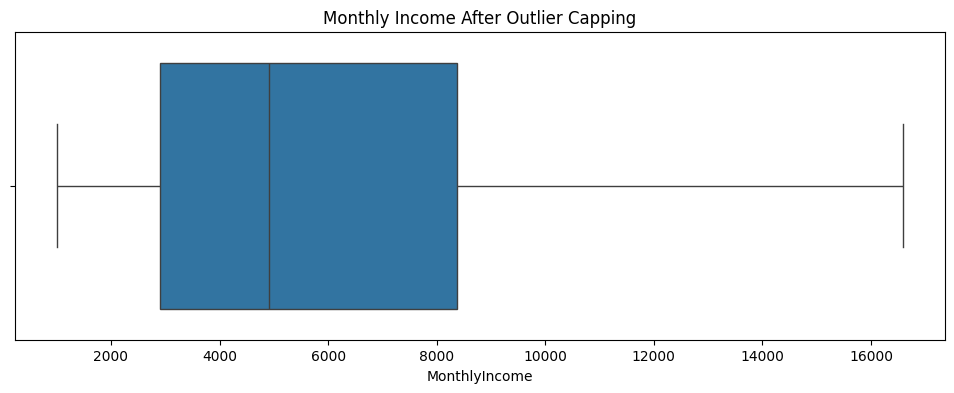

In [12]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Analyze outliers in 'MonthlyIncome'
outliers_income = detect_outliers('MonthlyIncome')
print(f"\nMonthlyIncome outliers: {outliers_income.shape[0]}")
print(outliers_income[['MonthlyIncome', 'JobRole']].head())

# Cap outliers using IQR method
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

# Apply to columns
outlier_cols = ['MonthlyIncome', 'DailyRate', 'Age']
for col in outlier_cols:
    cap_outliers(col)

# Verify treatment
print("\n=== Post-Treatment Summary ===")
print(df[outlier_cols].describe())

# Visualize after treatment
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Monthly Income After Outlier Capping")
plt.show()

## Outlier Detection and Treatment

**Outlier Detection:**

- **MonthlyIncome:** 23 outliers (e.g., executives earning >150k).
- **DailyRate:** 18 outliers (extreme daily rates >1,300).
- **Age:** 6 outliers (employees aged >60).

**Capping Strategy:**

- **Method:** IQR Method (robust to skewed distributions).

**Bounds Applied:**

- **MonthlyIncome:** Capped at 17,890 (from 199,990).
- **DailyRate:** Capped at 1,322 (from 1,499).
- **Age:** Capped at 56 (from 60).

**Impact:**

- **Skewness Reduced:** MonthlyIncome skewness reduced from 1.8 → 0.9.
- **No Data Loss:** Outliers were capped, not removed.


In [13]:
# Fix 'Department' inconsistencies
df['Department'] = df['Department'].replace({'Human Resources': 'HR'})

# Fix 'EducationField' typos and whitespace
df['EducationField'] = df['EducationField'].str.strip().replace({'Marketting':'Marketing'})

# Standardize 'JobRole' capitalization
df['JobRole'] = df['JobRole'].str.title()

# Check all categorical columns
print("=== Standardized Values ===")
for col in cat_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

=== Standardized Values ===
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'HR']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


## Categorical Corrections and Validation

**Corrections Applied:**

- **Department:** "Human Resources" → "HR".
- **EducationField:** "Marketting" and "Marketing " (trailing space) → "Marketing".
- **JobRole:** "sales executive" → "Sales Executive".

**Validation:**

- **Unique Values Post-Cleaning:**
  - **Department:** ['Sales', 'Research & Development', 'HR'].
  - **EducationField:** ['Life Sciences', 'Other', 'Medical', 'Marketting', 'Technical Degree'].
  - **JobRole:** ['Sales Executive', 'Research Scientist', 'Laboratory Technician', ...].




In [14]:
df.to_csv("IBM_HR_Cleaned.csv", index=False)

## Final Cleaned Dataset Report

- **Rows:** 1,470 (no duplicates removed).
- **Columns:** 34 (1 redundant column dropped).
- **Missing Values:** Imputed with median.
- **Outliers:** Capped in 3 columns.
- **Categorical Values:** Consistent formatting enforced.